In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [2]:
df = pd.read_excel("Advanced_Time_Series_Data_Example.xlsx")

In [3]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")

In [4]:
train, test = df[:-364], df[-364:]

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [6]:
look_back = 30
n_features = 1

generator = TimeseriesGenerator(train, train,
                                length = look_back,
                                sampling_rate = 1,
                                stride = 1,
                                batch_size = 3)

In [7]:
model = Sequential()
model.add(LSTM(units = 200, return_sequences = True, input_shape=(look_back, n_features)))
model.add(Dropout(0.15))


#Add second LSTM layer 
model.add(LSTM(units = 200, return_sequences = True))
model.add(Dropout(0.2))

#Add third LSTM layer 
model.add(LSTM(units = 150, return_sequences = True))
model.add(Dropout(0.2))

#Add fourth LSTM layer 
model.add(LSTM(units = 150, return_sequences = True))
model.add(Dropout(0.2))

#Add fifth LSTM layer 
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

#Add sixth LSTM layer 
model.add(LSTM(units = 100, return_sequences = True, activation='relu'))
model.add(Dropout(0.2))

#Add seventh LSTM layer 
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

#Add Eighth LSTM layer 
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

#Add Ninth LSTM layer 
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

#Add tenth LSTM layer 
model.add(LSTM(units = 25, return_sequences = True))
model.add(Dropout(0.2))

#Add eleventh LSTM layer 
model.add(LSTM(units = 25, return_sequences = True, activation='relu'))
model.add(Dropout(0.2))


#flatten
model.add(Flatten())


model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

W0101 12:12:50.709234 19376 deprecation_wrapper.py:119] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0101 12:12:50.724239 19376 deprecation_wrapper.py:119] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0101 12:12:50.726207 19376 deprecation_wrapper.py:119] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0101 12:12:50.980241 19376 deprecation_wrapper.py:119] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please us

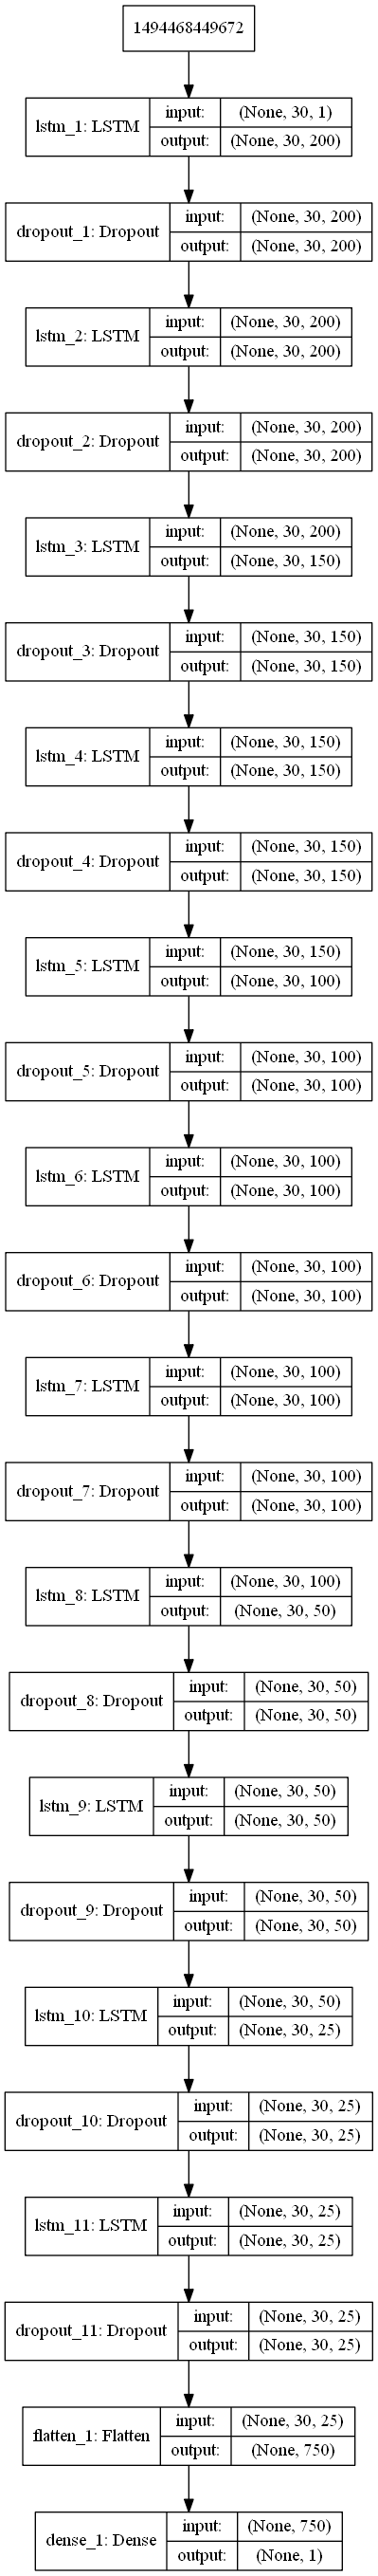

In [8]:
from keras.utils import plot_model
plot_model(model, to_file='advanced_model.png', show_shapes=True)
from IPython.display import Image
Image(filename='advanced_model.png')

In [9]:
model.fit_generator(generator, epochs=100)

W0101 12:12:54.368378 19376 deprecation.py:323] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0101 12:13:02.057665 19376 deprecation_wrapper.py:119] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/500
112/112 [==============================] - 84s 749ms/step - loss: 0.1252
Epoch 2/500
112/112 [==============================] - 89s 791ms/step - loss: 0.1028
Epoch 3/500
112/112 [==============================] - 83s 743ms/step - loss: 0.1022
Epoch 4/500
112/112 [==============================] - 68s 603ms/step - loss: 0.1013
Epoch 5/500
112/112 [==============================] - 65s 576ms/step - loss: 0.0983
Epoch 6/500
112/112 [==============================] - 74s 660ms/step - loss: 0.1006
Epoch 7/500
112/112 [==============================] - 78s 694ms/step - loss: 0.0971
Epoch 8/500
112/112 [==============================] - 76s 680ms/step - loss: 0.0997
Epoch 9/500
112/112 [==============================] - 73s 648ms/step - loss: 0.0971
Epoch 10/500
112/112 [==============================] - 70s 627ms/step - loss: 0.1003
Epoch 11/500
112/112 [==============================] - 72s 640ms/step - loss: 0.1003
Epoch 12/500
112/112 [==============================] - 70s 621

112/112 [==============================] - 60s 532ms/step - loss: 0.0948
Epoch 97/500
112/112 [==============================] - 61s 545ms/step - loss: 0.0951
Epoch 98/500
112/112 [==============================] - 61s 542ms/step - loss: 0.0944
Epoch 99/500
112/112 [==============================] - 61s 543ms/step - loss: 0.0954
Epoch 100/500
112/112 [==============================] - 61s 547ms/step - loss: 0.0949
Epoch 101/500
112/112 [==============================] - 62s 552ms/step - loss: 0.0948
Epoch 102/500
112/112 [==============================] - 61s 545ms/step - loss: 0.0936
Epoch 103/500
112/112 [==============================] - 62s 555ms/step - loss: 0.0941
Epoch 104/500
112/112 [==============================] - 61s 546ms/step - loss: 0.0940
Epoch 105/500
112/112 [==============================] - 61s 541ms/step - loss: 0.0942
Epoch 106/500
112/112 [==============================] - 61s 546ms/step - loss: 0.0949
Epoch 107/500
112/112 [==============================] - 62s

112/112 [==============================] - 81s 727ms/step - loss: 0.0939
Epoch 191/500
112/112 [==============================] - 73s 648ms/step - loss: 0.0947
Epoch 192/500
112/112 [==============================] - 70s 621ms/step - loss: 0.0949
Epoch 193/500
112/112 [==============================] - 65s 580ms/step - loss: 0.0936
Epoch 194/500
112/112 [==============================] - 62s 558ms/step - loss: 0.0943
Epoch 195/500
112/112 [==============================] - 61s 547ms/step - loss: 0.0941
Epoch 196/500
112/112 [==============================] - 65s 579ms/step - loss: 0.0950
Epoch 197/500
112/112 [==============================] - 59s 524ms/step - loss: 0.0936
Epoch 198/500
112/112 [==============================] - 59s 527ms/step - loss: 0.0940
Epoch 199/500
112/112 [==============================] - 60s 538ms/step - loss: 0.0944
Epoch 200/500
112/112 [==============================] - 60s 531ms/step - loss: 0.0942
Epoch 201/500
112/112 [==============================] - 

112/112 [==============================] - 60s 534ms/step - loss: 0.0939
Epoch 285/500
112/112 [==============================] - 60s 535ms/step - loss: 0.0937
Epoch 286/500
112/112 [==============================] - 61s 542ms/step - loss: 0.0935
Epoch 287/500
112/112 [==============================] - 60s 538ms/step - loss: 0.0938
Epoch 288/500
112/112 [==============================] - 60s 536ms/step - loss: 0.0936
Epoch 289/500
112/112 [==============================] - 60s 538ms/step - loss: 0.0932
Epoch 290/500
112/112 [==============================] - 60s 539ms/step - loss: 0.0937
Epoch 291/500
112/112 [==============================] - 60s 539ms/step - loss: 0.0928
Epoch 292/500
112/112 [==============================] - 60s 536ms/step - loss: 0.0939
Epoch 293/500
112/112 [==============================] - 60s 537ms/step - loss: 0.0935
Epoch 294/500
112/112 [==============================] - 60s 536ms/step - loss: 0.0937
Epoch 295/500
112/112 [==============================] - 

KeyboardInterrupt: 

In [10]:
model.save('advanced_template_model.h')

In [11]:
from keras.models import load_model
model = load_model('advanced_template_model.h')

In [12]:
model.evaluate_generator(generator)

0.09324300392264766

In [13]:
trainPredict = model.predict_generator(generator)
trainPredict.shape

(336, 1)

In [14]:
trainPredict = scaler.inverse_transform(trainPredict)

In [15]:
train = scaler.inverse_transform(train)
train.shape

(366, 1)

In [16]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(train)

trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict




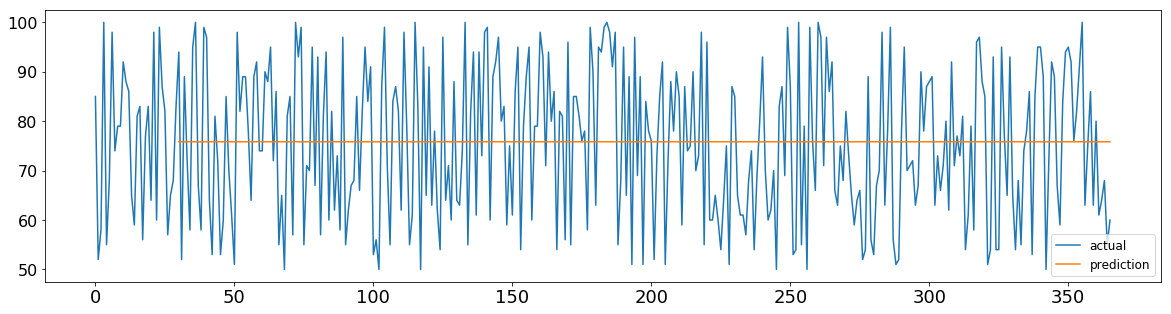

In [17]:
plt.figure(figsize=(20, 5))
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.plot(train, label="actual")
plt.plot(trainPredictPlot, label="prediction")
plt.legend(loc='best', fontsize='large')
plt.show()

In [18]:
train = df

In [19]:
scaler.fit(train)
train = scaler.transform(train)

In [20]:
look_back = 30
n_features = 1

generator = TimeseriesGenerator(train, train,
                                length = look_back,
                                sampling_rate = 1,
                                stride = 1,
                                batch_size = 3)

In [21]:
pred_list = []

batch = train[-look_back:].reshape((1, look_back, n_features))

for i in range(look_back):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [24]:
from pandas.tseries.offsets import DateOffset

add_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,31) ]

future_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)

In [25]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-look_back:].index, columns=['Prediction'])

df_proj = pd.concat([df, df_predict], axis=1)

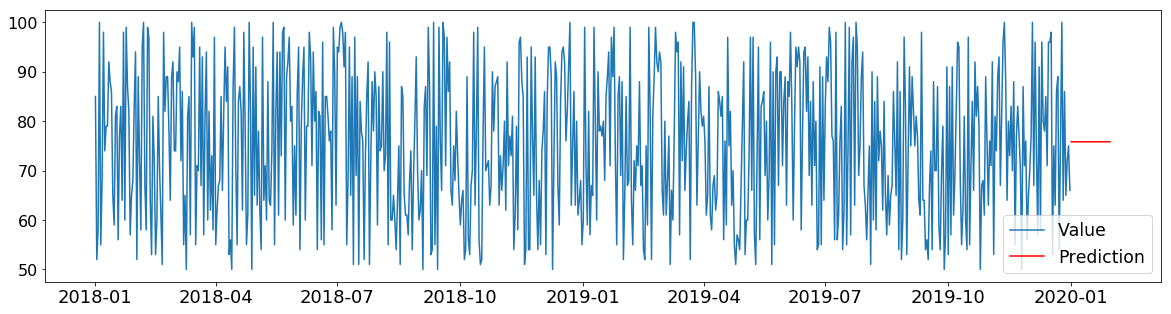

In [26]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['Value'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()